## **Problem Statement**

 You working as a Data Scientist in the bank, you're to build a neural network-based classifier that can determine whether a Bank customer will leave or not in the next 6 months, also understand which aspects of the service influence a customer's decision in this regard

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import sklearn
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#To import different metrics 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
%matplotlib inline

In [2]:
churn = pd.read_csv('churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df=churn

In [4]:
# Statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#dropping unecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
#converting object into categorical data and encoding 
df["Geography"]=df["Geography"].astype("category")

In [15]:
df=pd.get_dummies(data=df, columns=['Geography'])

In [16]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [17]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


## Feature Engineering and Data Visualizations

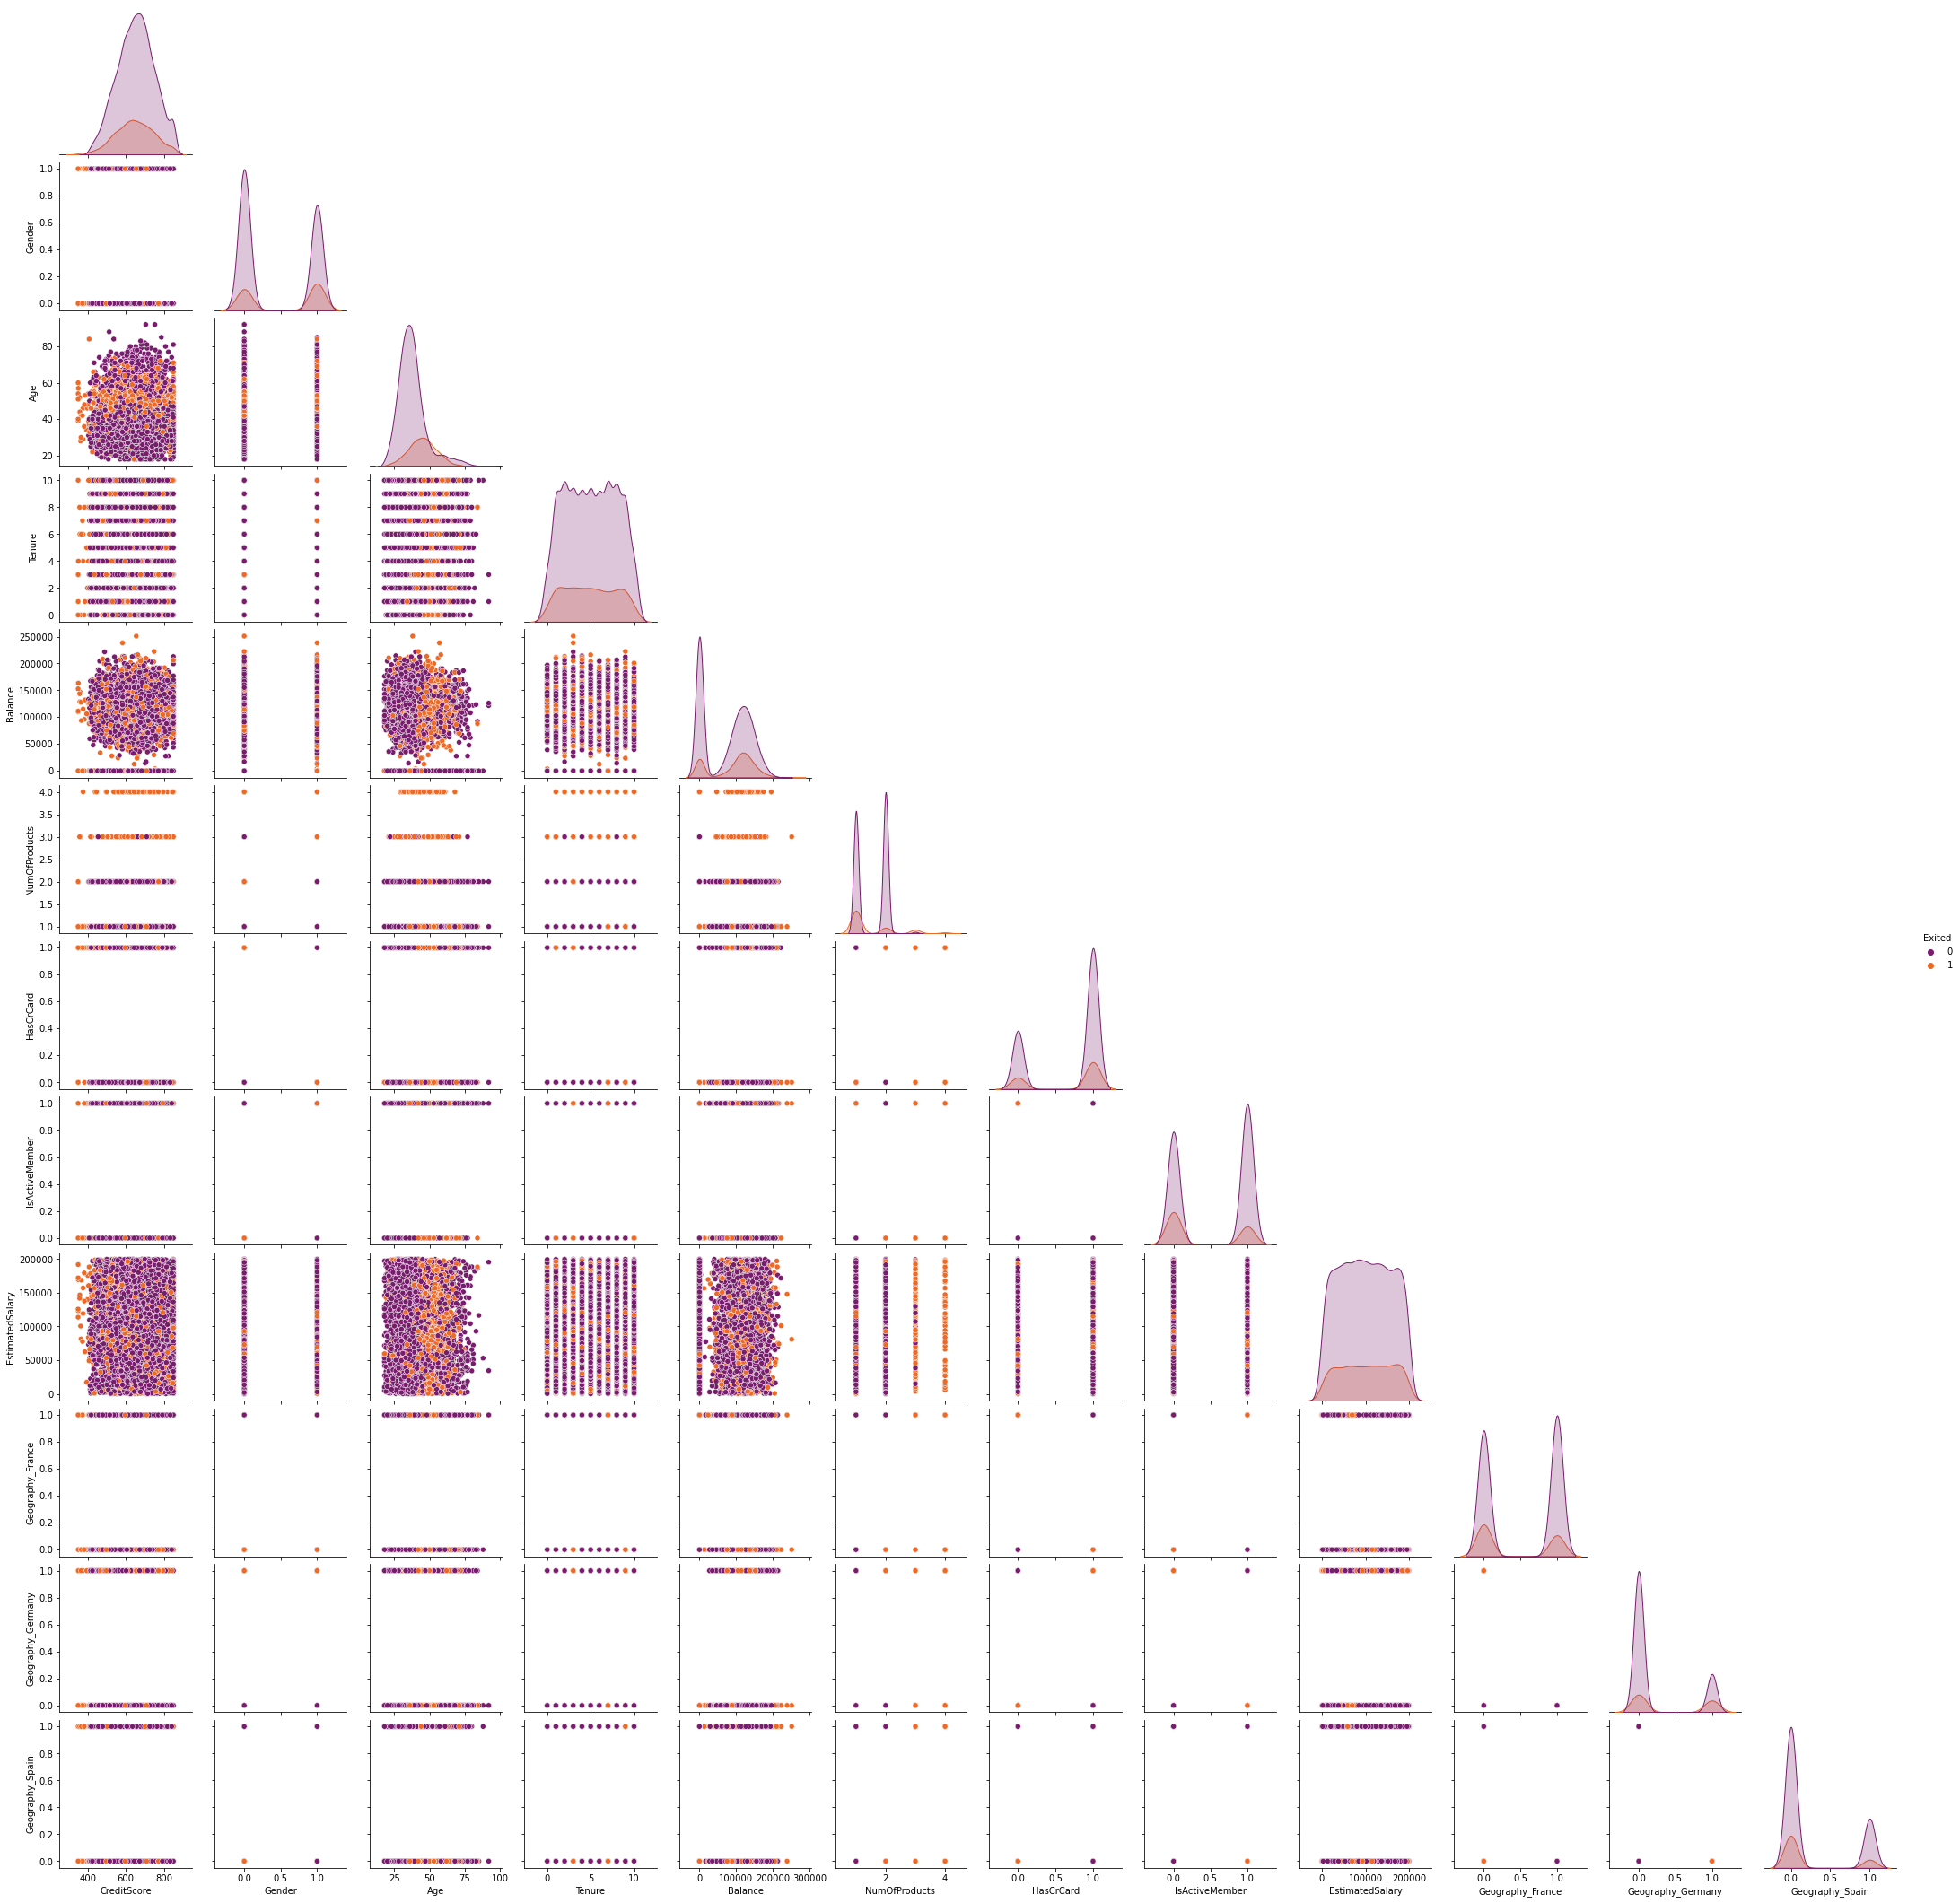

In [19]:
sns.pairplot(df, hue="Exited", palette="inferno", corner=True);

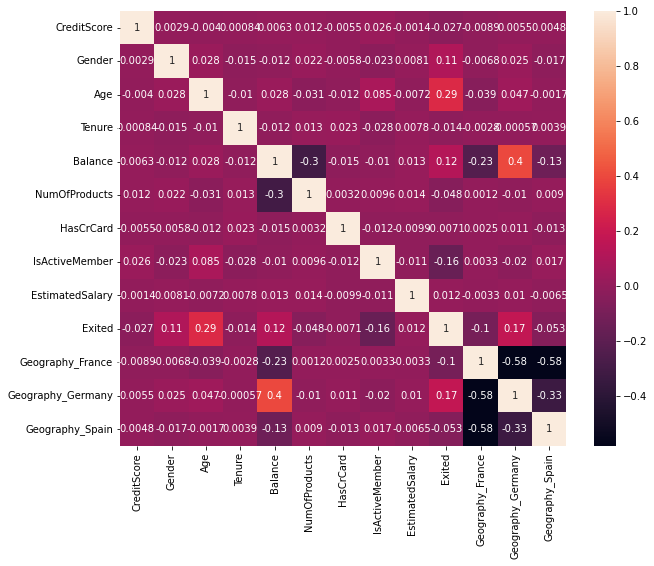

In [20]:
#Correlation Graph to check correlation 
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True);

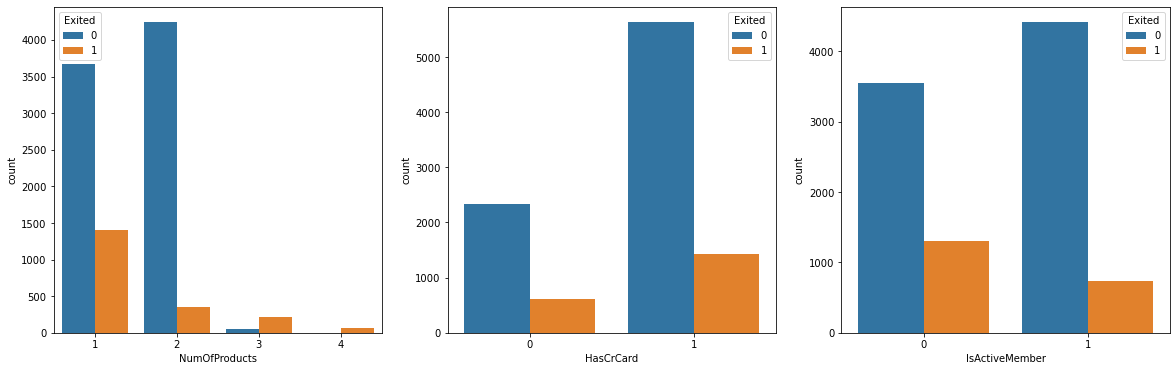

In [21]:
_, ax = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace=0.2)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2]);

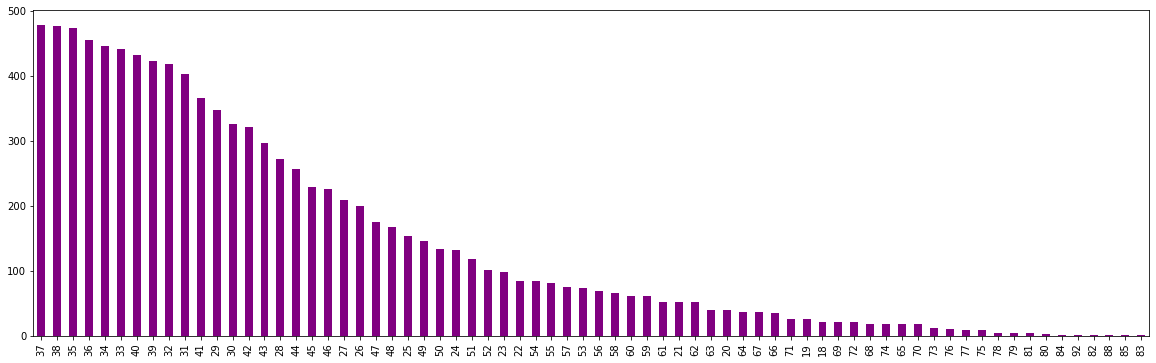

In [22]:
df["Age"].value_counts().plot.bar(figsize=(20,6), color="purple");

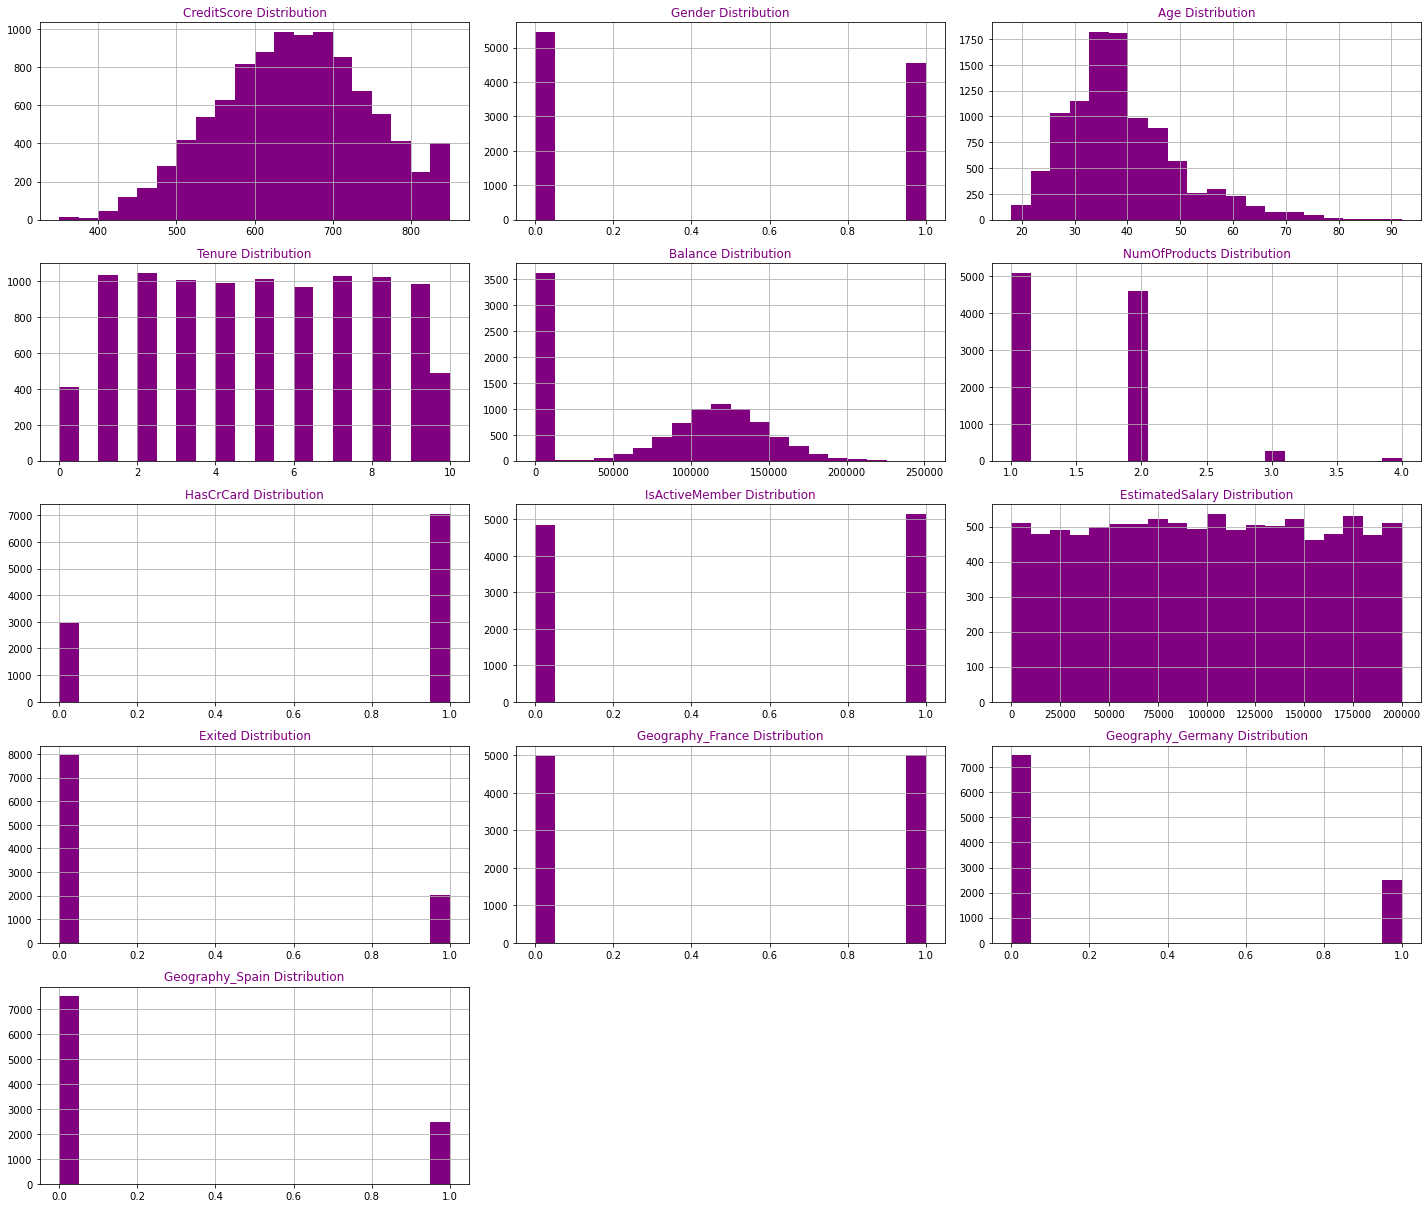

In [23]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='purple')
        ax.set_title(feature+" Distribution",color='purple')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

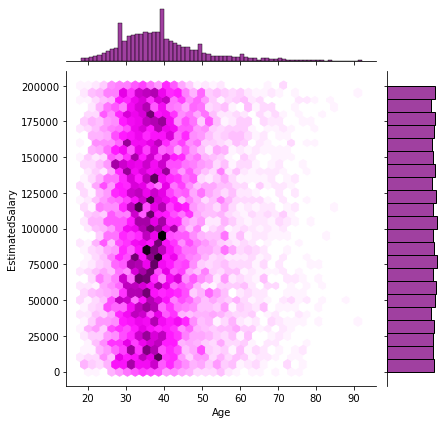

In [24]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, kind = 'hex', color = 'purple');

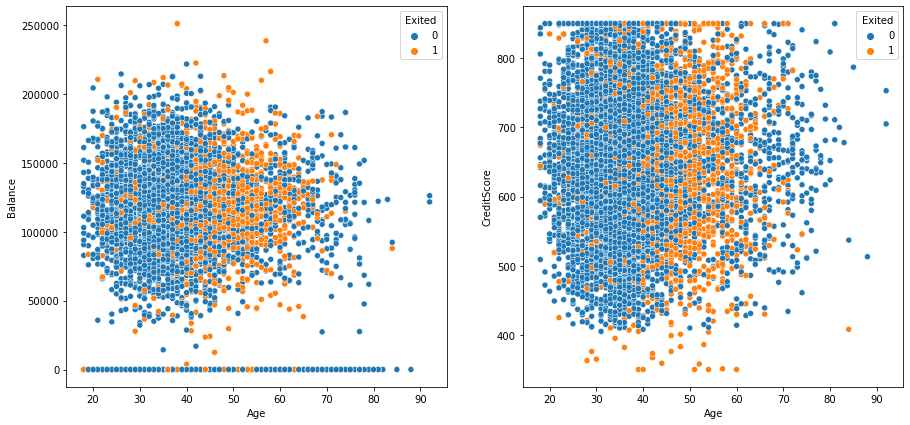

In [25]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1]);

In [26]:
tenure_exit0 = df[df.Exited==0].Tenure
tenure_exit1 = df[df.Exited==1].Tenure

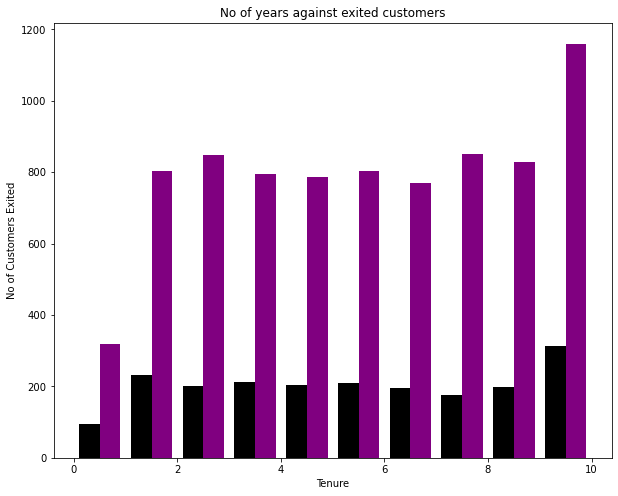

In [27]:
plt.figure(figsize=(10,8))
plt.xlabel('Tenure')
plt.ylabel('No of Customers Exited')
plt.title('No of years against exited customers')
plt.hist([tenure_exit1,tenure_exit0], color=['black','purple'], label=['Exited-yes','Exited-No'])
plt.show();

In [28]:
creditscore_exit0=df[df.Exited==0].CreditScore
creditscore_exit1=df[df.Exited==1].CreditScore

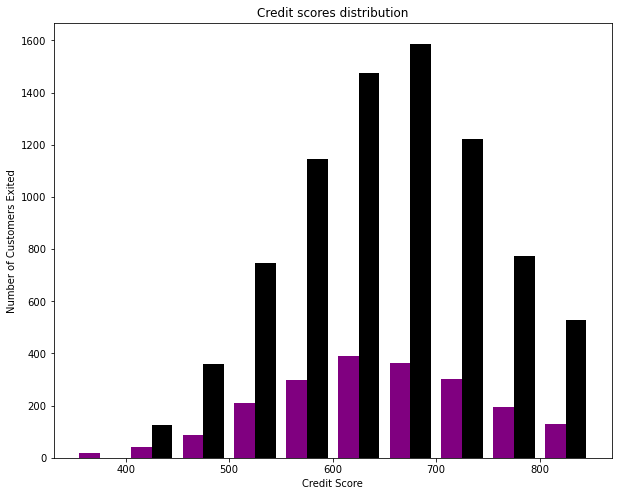

In [29]:
plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Credit scores distribution')
plt.hist([creditscore_exit1,creditscore_exit0], 
         color=['purple','black'], label=['Exited-yes','Exited-No'])
plt.show();

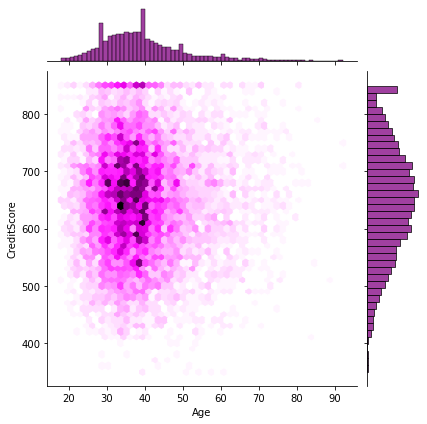

In [30]:
sns.jointplot(x = 'Age', y = 'CreditScore', data = df, kind = 'hex', color = 'purple');

In [31]:
NoOfProducts_exited0=df[df.Exited==0].NumOfProducts
NoOfProducts_exited1=df[df.Exited==1].NumOfProducts

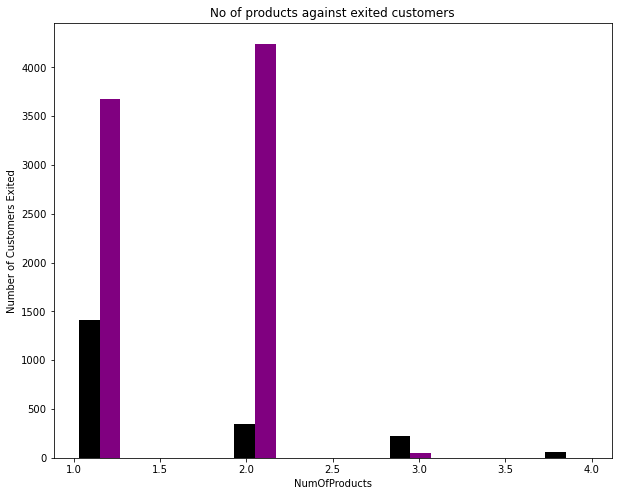

In [32]:
plt.figure(figsize=(10,8))
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers Exited')
plt.title('No of products against exited customers')
plt.hist([NoOfProducts_exited1,NoOfProducts_exited0],
         color=['black','purple'], label=['Exited-yes','Exited-No'])
plt.show();

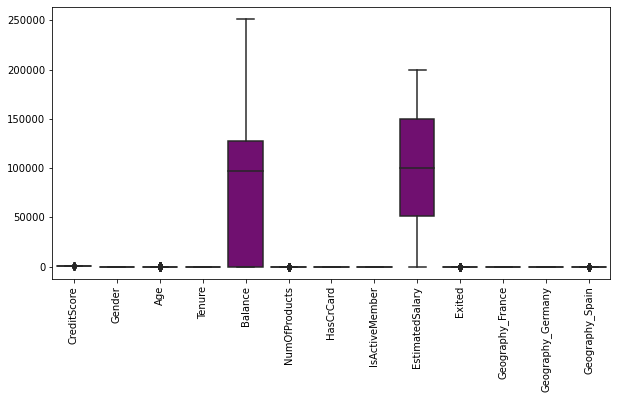

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, color='purple')
plt.xticks(rotation=90)       
plt.show()

In [34]:
Age_exited0=df[df.Exited==0].Age
Age_exited1=df[df.Exited==1].Age

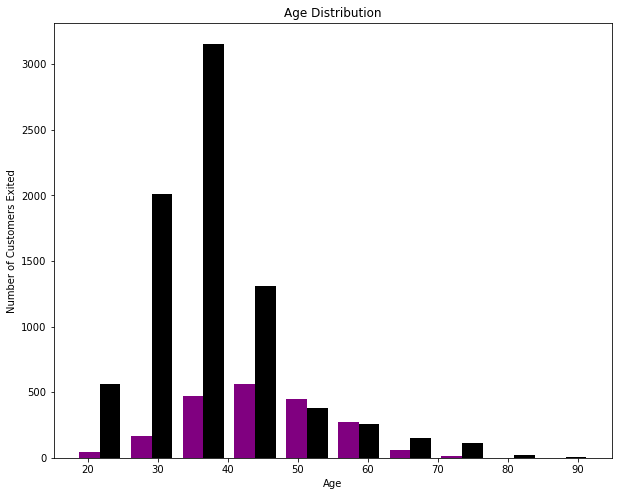

In [35]:
plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Exited')
plt.title('Age Distribution')
plt.hist([Age_exited1,Age_exited0], color=['purple','black'], 
         label=['Exited-yes','Exited-No'])
plt.show()

Percentage of "being churn": % 20.37 --> (2037 churn cases out of 10000)
Percentage of "NOT being churn": % 79.63 --> (7963 NOT churn cases out of 10000)


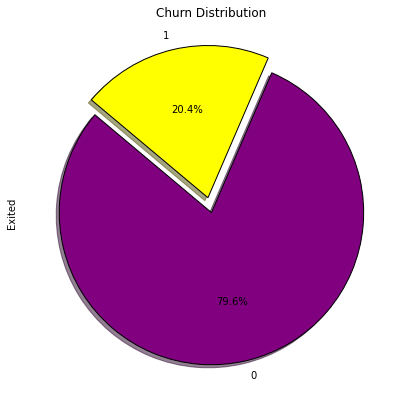

In [36]:
y = df['Exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["Exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['purple', 'yellow'], 
                                 startangle=140)
plt.title('Churn Distribution');

In [37]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [38]:
# Normalizing / scaling the independent variable
cols_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
sc = MinMaxScaler()
df[cols_scale]=sc.fit_transform(df[cols_scale])

* Splitting the data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['Exited'], axis=1)
Y = df['Exited']
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

### Model building

* i'm using accuracy as a metric, because Accuracy is the percentage of predictions that are correct, calculated by dividing the number of correct predictions by the total number of predictions. Accuracy is a good metric to use if you want to minimize the overall number of errors


In [41]:
def build_model():
  ## Initializing the ANN
  model = Sequential() 
  # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
  input_layer = Dense(64, input_shape=(X_train.shape[1],),activation='relu')
  model.add(input_layer) # 
  #Adding the hidden layer
  
  hidden_layer = Dense(32, activation='relu'); 
  model.add(hidden_layer) 
  #Adding the output layer
  
  # we need to pass only one neuron in the output layer.
  output_layer = Dense(1, activation='sigmoid') 
  model.add(output_layer)

  # Compile the model
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

Build the model and view the summary

In [42]:
#Getting the model summary. We are uisng standalone keras to build our model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


Let’s now train the model for 50 epochs, and record the training and validation accuracy in ‘history’.

In [43]:
#Definign the number of epochs
EPOCHS = 50
#fitting the model
history = model.fit(X_train, y_train,epochs=EPOCHS, validation_split = 0.2)

Epoch 1/50
175/175 [==============================] - 2s 4ms/step - loss: 0.4846 - accuracy: 0.7989 - val_loss: 0.4622 - val_accuracy: 0.8050
Epoch 2/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.8046 - val_loss: 0.4504 - val_accuracy: 0.8071
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8120 - val_loss: 0.4399 - val_accuracy: 0.8014
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8148 - val_loss: 0.4338 - val_accuracy: 0.8121
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8166 - val_loss: 0.4259 - val_accuracy: 0.8179
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8252 - val_loss: 0.4199 - val_accuracy: 0.8200
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8316 - val_loss: 0.4122 - val_accuracy: 0.8257
Epoch 

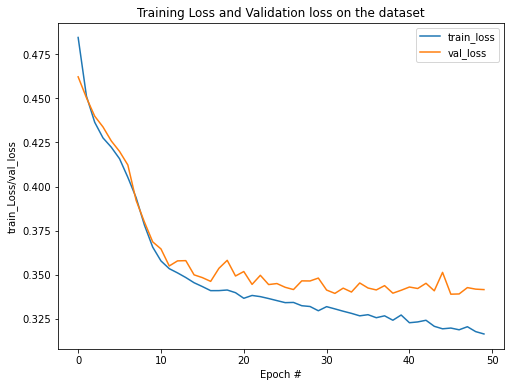

In [44]:
N = 50
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="upper right")
plt.show()

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.347991019487381
Test accuracy: 0.8600000143051147


In [46]:
# Make predictions
predictions = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [47]:
from sklearn.metrics import roc_curve, auc

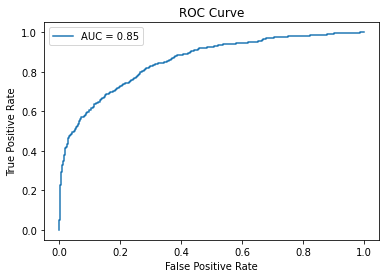

In [48]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Model_2
### Build another model to implement these improvements

In [49]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 12 variables and 128 neurons with relu as activation function
model_2.add(Dense(128, activation='relu', input_shape=(12,)))
# adding second hidden layer with 64 neurons and relu as activation function
model_2.add(Dense(64, activation='relu'))
# adding first hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))
# adding the output layer with 1 neuron and linear as activation function
model_2.add(Dense(1, activation='sigmoid'))

In [50]:
# Summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1664      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Defining the optimizer
optimizer = tf.keras.optimizers.Adam(0.0001) 
# Compiling the model
model_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Fitting the model on train data
history = model_2.fit(X_train, y_train, validation_split = 0.2, epochs=50)

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5586 - accuracy: 0.7650 - val_loss: 0.4937 - val_accuracy: 0.7993
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7984 - val_loss: 0.4776 - val_accuracy: 0.7993
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7984 - val_loss: 0.4706 - val_accuracy: 0.7993
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7986 - val_loss: 0.4654 - val_accuracy: 0.8007
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.8011 - val_loss: 0.4600 - val_accuracy: 0.8050
Epoch 6/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.8030 - val_loss: 0.4544 - val_accuracy: 0.8086
Epoch 7/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8079 - val_loss: 0.4488 - val_accuracy: 0.8100
Epoch 

94/94 [==============================] - 0s 2ms/step


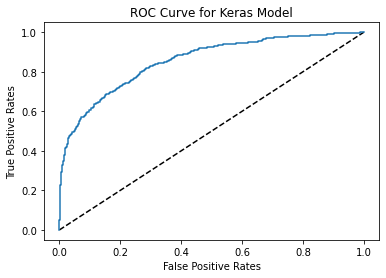

In [52]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [53]:
roc_auc_score(y_test, y_pred_proba)

0.8549592000919435

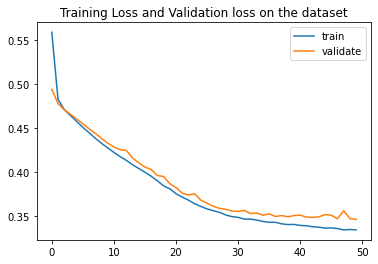

In [54]:
from matplotlib import pyplot
pyplot.title('Training Loss and Validation loss on the dataset')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

- train loss is decreasing and the validation loss is also decreasing therefore model is not overfitting or underfitting
- there is some noise in the validation data

## Model_3

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [56]:
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential

In [57]:
# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(12,)))
# Adding Dropout with 20%
model_3.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Dropout with 10%
model_3.add(Dropout(0.2))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='sigmoid'))

In [58]:
# Model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainabl

In [59]:
from keras import callbacks

In [60]:
# Initializing the Optimizer
optimizer = tf.keras.optimizers.Adam(0.0001)
# Compiling the model with 'binary_crossentropy' as loss function and metrics
model_3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_3 = model_3.fit(X_train, y_train, validation_split = 0.2, epochs=50,callbacks=es_cb)

Epoch 1/50
175/175 [==============================] - 2s 4ms/step - loss: 0.6171 - accuracy: 0.6979 - val_loss: 0.5387 - val_accuracy: 0.7993
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5321 - accuracy: 0.7904 - val_loss: 0.5012 - val_accuracy: 0.7993
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7970 - val_loss: 0.4917 - val_accuracy: 0.7993
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5018 - accuracy: 0.7970 - val_loss: 0.4866 - val_accuracy: 0.7993
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7986 - val_loss: 0.4825 - val_accuracy: 0.7993
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.7979 - val_loss: 0.4791 - val_accuracy: 0.7993
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 0.4884 - accuracy: 0.7980 - val_loss: 0.4771 - val_accuracy: 0.7993
Epoch 

94/94 [==============================] - 0s 1ms/step


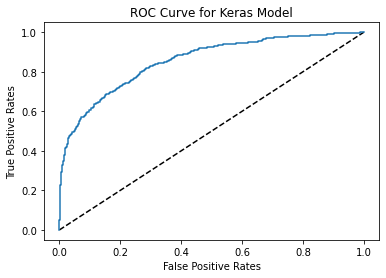

In [61]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [62]:
roc_auc_score(y_test, y_pred_proba)

0.8549592000919435

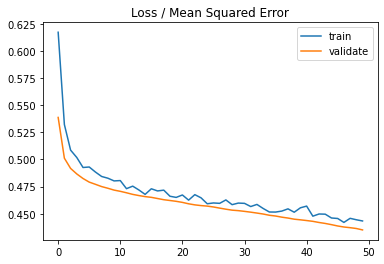

In [63]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

## Model 4

In [64]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 12 variables and 128 neurons with relu as activation function
model_4.add(Dense(128, activation='relu', input_shape=(12,)))
# adding second hidden layer with 64 neurons and relu as activation function
model_4.add(Dense(64, activation='relu'))
# adding first hidden layer with 32 neurons and relu as activation function
model_4.add(Dense(32, activation='relu'))
# adding the output layer with 1 neuron and linear as activation function
model_4.add(Dense(1, activation='sigmoid'))

In [66]:
# Summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Defining the optimizer
optimizer = tf.keras.optimizers.Adam(0.0001) 
# Compiling the model
model_4.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# Fitting the model on train data
history_4 = model_4.fit(X_train, y_train, validation_split = 0.2, epochs=60)

Epoch 1/60
175/175 [==============================] - 2s 4ms/step - loss: 0.6188 - accuracy: 0.7159 - val_loss: 0.5198 - val_accuracy: 0.7993
Epoch 2/60
175/175 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7984 - val_loss: 0.4805 - val_accuracy: 0.7993
Epoch 3/60
175/175 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7984 - val_loss: 0.4714 - val_accuracy: 0.7993
Epoch 4/60
175/175 [==============================] - 1s 3ms/step - loss: 0.4621 - accuracy: 0.7989 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 5/60
175/175 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.8020 - val_loss: 0.4602 - val_accuracy: 0.8050
Epoch 6/60
175/175 [==============================] - 1s 3ms/step - loss: 0.4499 - accuracy: 0.8054 - val_loss: 0.4552 - val_accuracy: 0.8093
Epoch 7/60
175/175 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.8086 - val_loss: 0.4505 - val_accuracy: 0.8100
Epoch 

175/175 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8605 - val_loss: 0.3492 - val_accuracy: 0.8550
Epoch 59/60
175/175 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8602 - val_loss: 0.3484 - val_accuracy: 0.8514
Epoch 60/60
175/175 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8607 - val_loss: 0.3500 - val_accuracy: 0.8471


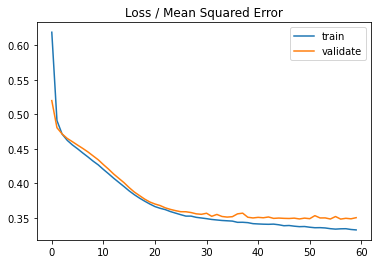

In [68]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

94/94 [==============================] - 0s 1ms/step


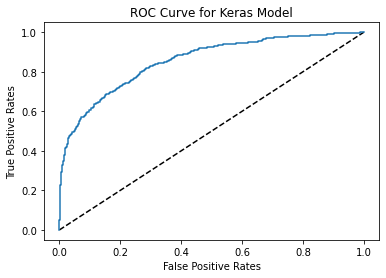

In [69]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [70]:
roc_auc_score(y_test, y_pred_proba)

0.8549592000919435

- The train and validation curves are smooth
-  increasing the layers, both the curves seems to be smooth.
-  a learning rate of 0.0001 and 0.001 is used during model building
- binary_crossentropy, adam optimizer, accuracy metric was used

***Actionable Insights & Recommendations***

- % 20.4 of customers, who represent 2037 people out of 10000, didn't show loyalty to the company and got churned while % 79.6 of which representing 7960 people out of 10000 showed loyalty to the company.
- Customer with 3 or 4 products have higher chances to Churn
- 35 to 60 years old customers have higher chances to churn
- there's a signinficant difference in age categories exiting bank.
- first impression matters, they should place focus on those buying products for the first time
- those between 35 & 60 should 
- there's a significant difference in the duration of customers exiting the bank, and therefore they should offer better products to both new and old customers